# Clustering Assignment (HELP International)

## Importing the requisite modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and Understanding the data

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
# Checking the head of the dataframe
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Checking the shape of the dataframe
df.shape

(167, 10)

In [5]:
# checking the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Converting the values of exports, health and imports colums from percentage values to actual values for analysis
df['exports'] = round(((df['exports']*df['gdpp'])/100),2)
df['health'] = round(((df['health']*df['gdpp'])/100),2)
df['imports'] = round(((df['imports']*df['gdpp'])/100),2)

In [7]:
# checking the head
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [8]:
# checking the statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
# Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No such missing values has been found in the dataset

### Performing EDA on the dataset

#### Univariate Analysis

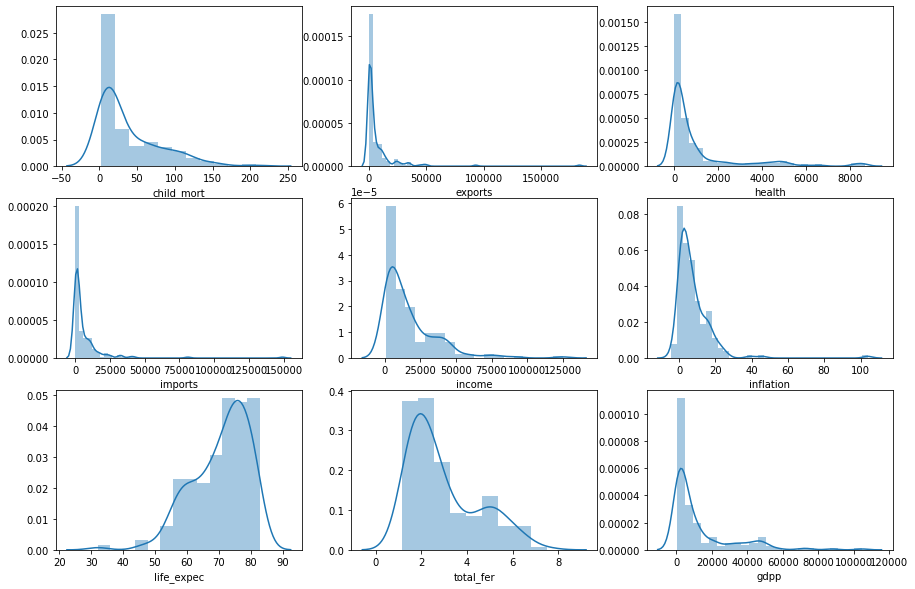

In [10]:
plt.figure(figsize = (15,10))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

As per the above plot it is found that except life_expec column data of all the other columns are left-skewed.

#### Bivariate Analysis

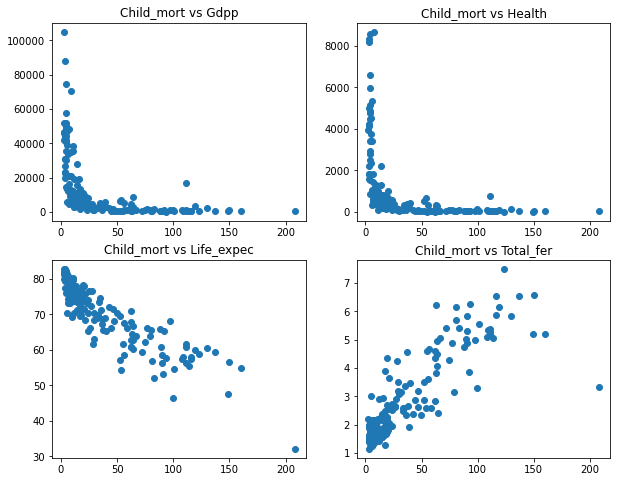

In [11]:
# Comparing child_mort with respect to gdpp, health, life_expec and total_fer
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
plt.scatter(x= 'child_mort', y='gdpp', data=df)
plt.title('Child_mort vs Gdpp')

plt.subplot(2,2,2)
plt.scatter(x= 'child_mort', y='health', data=df)
plt.title('Child_mort vs Health')

plt.subplot(2,2,3)
plt.scatter(x= 'child_mort', y='life_expec', data=df)
plt.title('Child_mort vs Life_expec')

plt.subplot(2,2,4)
plt.scatter(x= 'child_mort', y='total_fer', data=df)
plt.title('Child_mort vs Total_fer')

plt.show()

It is observed that relationship of child_mort with gdpp and health almost shows a similar relationship. It is also observed that child_mort shows a negative linear relationship with life_Expec and shows a positive linear relationship with Total_fer.

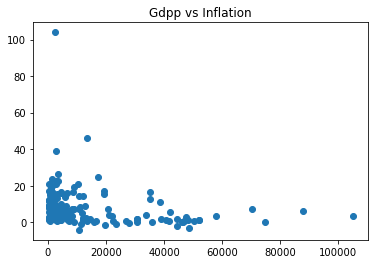

In [12]:
# Comparing gdpp w.r.t inflation
plt.scatter(x= 'gdpp', y='inflation', data=df)
plt.title('Gdpp vs Inflation')
plt.show()

It is observed that countries with lower gdpp shows higher inflation

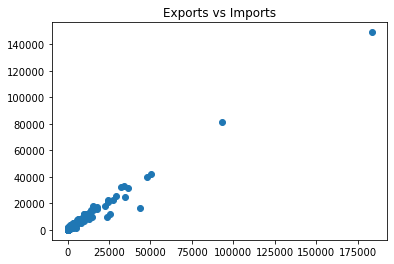

In [13]:
# Comparing exports vs imports
plt.scatter(x= 'exports', y='imports', data=df)
plt.title('Exports vs Imports')

plt.show()

Export and Import shows a positive linear relationship

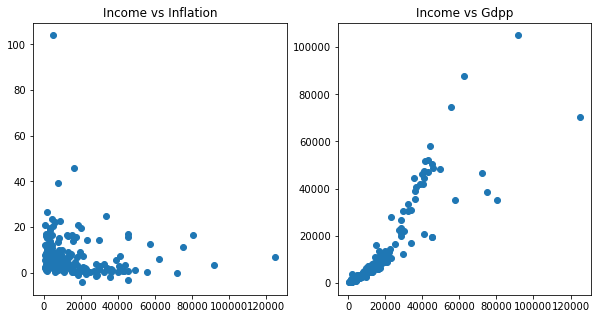

In [14]:
# Comparing Income w.r.t Inflation and Gdpp
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x='income', y='inflation', data=df)
plt.title('Income vs Inflation')

plt.subplot(1,2,2)
plt.scatter(x='income', y='gdpp', data=df)
plt.title('Income vs Gdpp')
plt.show()

Lower income level countries shows a higher inflation rate. Also income and gdpp shows a positive relationship

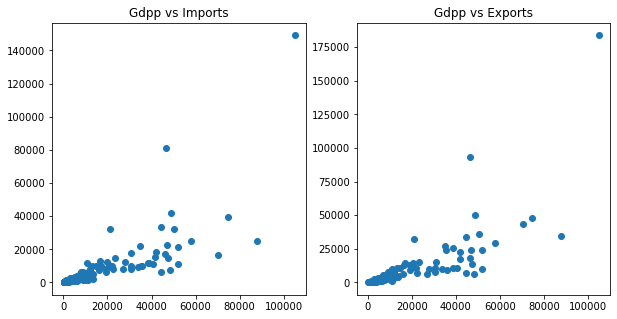

In [15]:
# Comparing gdpp w.r.t. imports and exports
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x= 'gdpp', y='imports', data=df)
plt.title('Gdpp vs Imports')

plt.subplot(1,2,2)
plt.scatter(x= 'gdpp', y='exports', data=df)
plt.title('Gdpp vs Exports')

plt.show()

Gdpp acts as an important factor for growth in imports and exports.

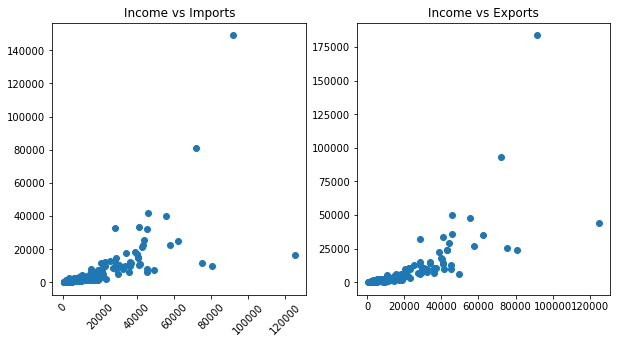

In [16]:
# Comparing income w.r.t. imports and exports
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x= 'income', y='imports', data=df)
plt.title('Income vs Imports')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.scatter(x= 'income', y='exports', data=df)
plt.title('Income vs Exports')

plt.show()

With rise in income levels, imports and exports shows growth

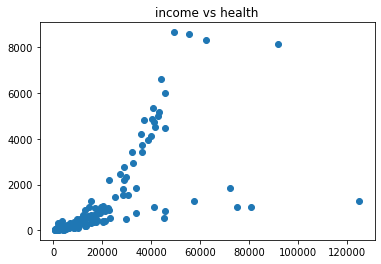

In [17]:
# Comparing income vs health
plt.scatter(x= 'income', y='health', data=df)
plt.title('income vs health')
plt.show()

As income increases, per capita spending on health also increases. In some countries it is also observed that there is a significant spending on health as the income increases.

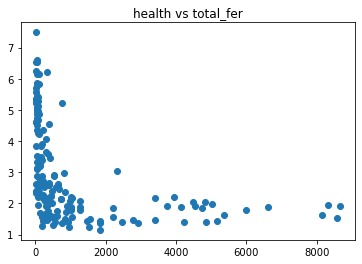

In [18]:
# Comparing health vs total_fer
plt.scatter(x= 'health', y='total_fer', data=df)
plt.title('health vs total_fer')
plt.show()

It is observed that total fertility is not dependent of spending on health

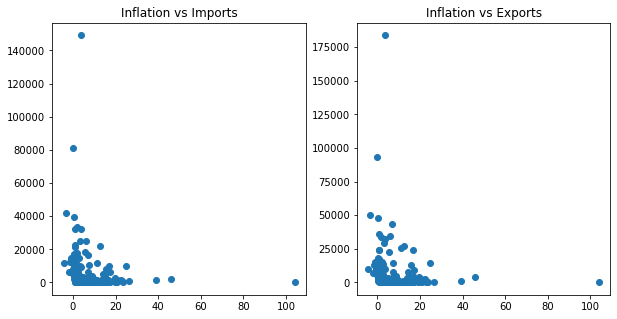

In [19]:
# Comparing inflation w.r.t imports and exports
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(x= 'inflation', y='imports', data=df)
plt.title('Inflation vs Imports')

plt.subplot(1,2,2)
plt.scatter(x= 'inflation', y='exports', data=df)
plt.title('Inflation vs Exports')

plt.show()

Imports and exports are not dependent of inflation

### Checking for the Outliers

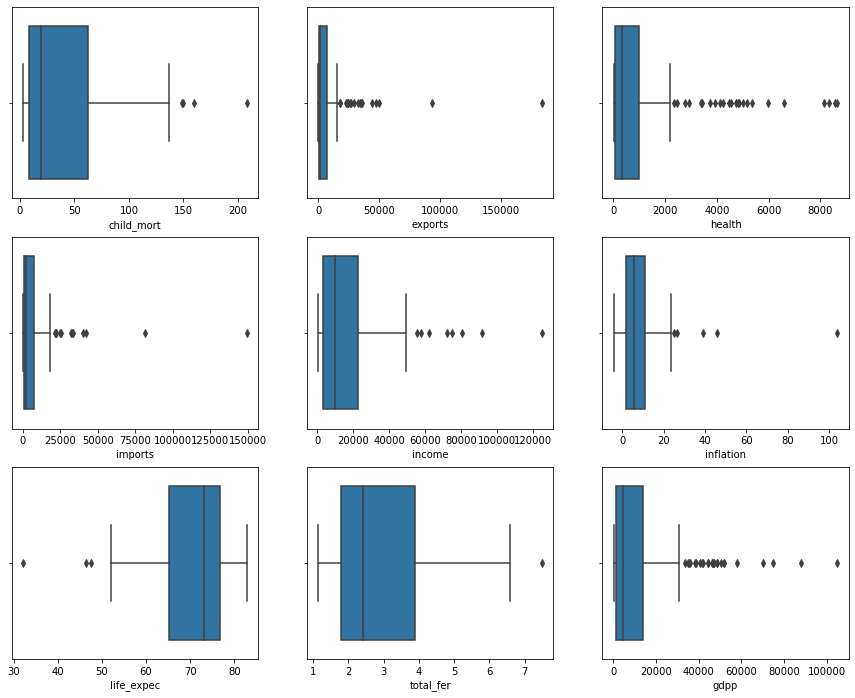

In [20]:
# Plotting the boxplots of each numeric columns to check for outliers
plt.figure(figsize=(15,12))
f=df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=df)

As per the above plots we observed outliers in various variables. As in the problem we are trying to find those countries which are in real need of getting the aid from HELP International, so outlier treatment may remove some important data points from the dataset. So here we are not dealing with the outliers and using the data as it is.

### Hopkins

In [21]:
# Checking the Hopkins Statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(df.drop('country',axis=1))

0.9199577819673104

### Scaling the Data

In [23]:
# Performing Standardisation of the dataset
ss = StandardScaler()
df_1 = ss.fit_transform(df.drop('country', axis=1))
df_1

array([[ 1.29153238, -0.4110113 , -0.56503842, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921488, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482717, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53849064, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059527, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54050066, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [24]:
# Conversion to Dataframe
df_1 = pd.DataFrame(df_1)
df_1.columns = df.columns[1:]
df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### KMeans Clustering

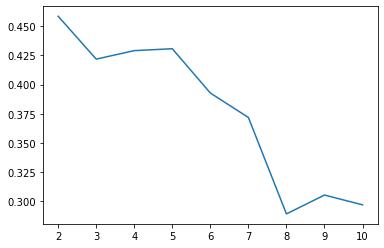

In [25]:
# Silhouette Analysis
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_1)
    ss.append([k, silhouette_score(df_1, kmean.labels_)])

sil = pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

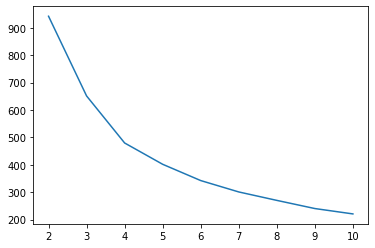

In [26]:
# Elbow Curve
ssd=[]
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df_1)
    ssd.append([k,kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0],ssd[1])

By observing the curve of Silhouette score and Elbow Curve I decided to take the optimize value of K, which is 3

### KMeans with K=3

In [27]:
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(df_1)

KMeans(n_clusters=3, random_state=0)

In [28]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [29]:
# Creating a new variable Cluster_ID with the labels of KMeans Algorithm
df['Cluster_ID'] = kmean.labels_

In [30]:
# Checking the head
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


In [31]:
# Checking the number of variables in each cluster
df['Cluster_ID'].value_counts()

2    91
0    48
1    28
Name: Cluster_ID, dtype: int64

### Analysing the clusters with respect to the three mentioned variables gdpp, child_mort and income

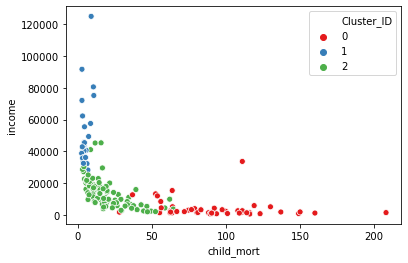

In [32]:
# Child_mort vs Income w.r.t Cluster_ID
sns.scatterplot(x='child_mort', y='income', hue='Cluster_ID', data=df, palette='Set1')

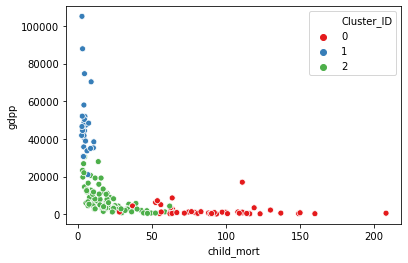

In [33]:
# Child_mort vs gdpp w.r.t Cluster_ID
sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster_ID', data=df, palette='Set1')

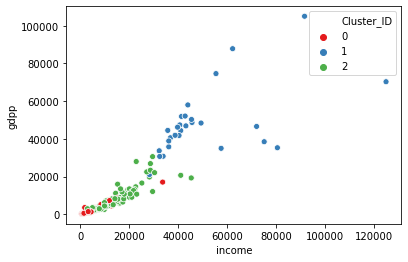

In [34]:
# Income vs gdpp w.r.t Cluster_ID
sns.scatterplot(x='income', y='gdpp', hue='Cluster_ID', data=df, palette='Set1')

### Cluster Profiling of clusters formed by KMeans

In [35]:
df[['child_mort','income','gdpp','Cluster_ID']].groupby('Cluster_ID').mean()

,child_mort,income,gdpp
Cluster_ID,,,
0,91.610417,3897.354167,1909.208333
1,5.046429,50178.571429,48114.285714
2,20.357143,13968.021978,7979.912088


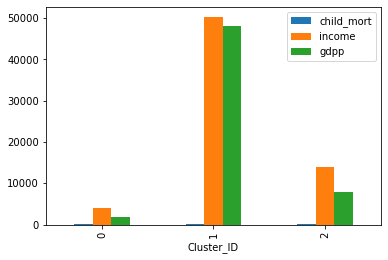

In [36]:
df[['child_mort','income','gdpp','Cluster_ID']].groupby('Cluster_ID').mean().plot(kind='bar')

### Find the requisite countries

In [37]:
# Creating a new dataframe with Cluster_ID=0
c0 = df[df['Cluster_ID']==0]

In [38]:
# Checking the new dataframe
c0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.60,527.05,3257.55,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,0


In [39]:
# Sorting the values of the new dataframe
c0.sort_values(by = ['income','child_mort','gdpp'], ascending=[True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446,0


As per the analysis which has been carried using KMeans Algorithm,the top 5 countries which are in the direst need of financial support from HELP Internatonal are - **Congo Dem Rep, Liberia, Burundi, Niger and 'Central African Republic**

### Hierarchial Clustering

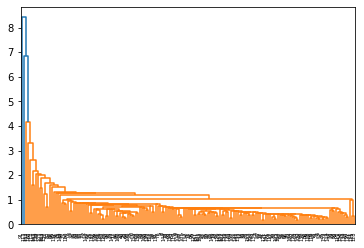

In [40]:
#single linkage
mergings = linkage(df_1, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

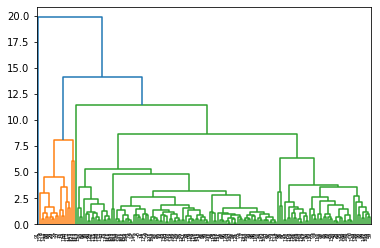

In [41]:
#complete linkage
mergings = linkage(df_1, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

Hierarchical cluster by single linkage method doen't give us a clear picture about the possible clusters. When used complete linkage method for hierarchical clustering me observe that cutting the dendrogram for no. of clusters = 3 will be the best possible method.

In [42]:
# Cutting the dendrogram
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [43]:
# Creating a new variable with cluster labels as formed by Hierarchical Clustering
df['Cluster_ID'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,0


In [44]:
# Checking the number of datapoints in each clusters
df['Cluster_ID'].value_counts()

0    148
1     18
2      1
Name: Cluster_ID, dtype: int64

### Analysing the clusters with respect to the three mentioned variables gdpp, child_mort and income

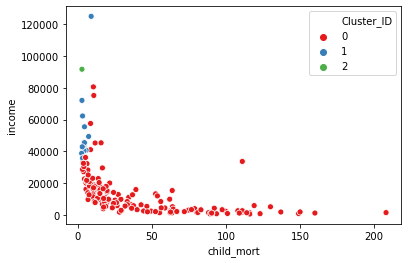

In [45]:
# Plotting child_mort vs income w.r.t Cluster_ID
sns.scatterplot(x='child_mort', y='income', hue='Cluster_ID', data=df, palette='Set1')

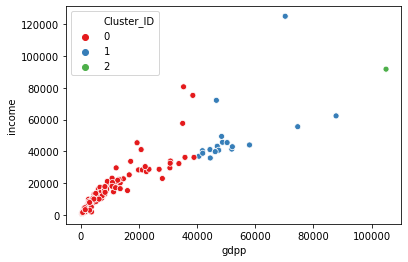

In [46]:
# Plotting gdpp vs income w.r.t Cluster_ID
sns.scatterplot(x='gdpp', y='income', hue='Cluster_ID', data=df, palette='Set1')

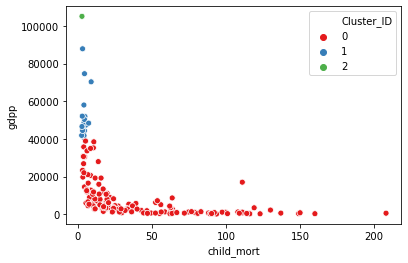

In [47]:
# Plotting child_mort vs gdpp w.r.t Cluster_ID
sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster_ID', data=df, palette='Set1')

### Cluster Profiling of clusters formed by Hierarchical Clustering Method

In [48]:
df[['child_mort','income','gdpp','Cluster_ID']].groupby('Cluster_ID').mean()

,child_mort,income,gdpp
Cluster_ID,,,
0,42.630405,12641.641892,7551.445946
1,4.388889,50027.777778,52355.555556
2,2.800000,91700.000000,105000.000000


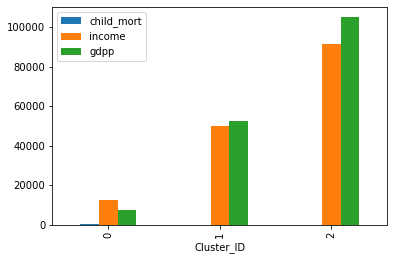

In [49]:
df[['child_mort','income','gdpp','Cluster_ID']].groupby('Cluster_ID').mean().plot(kind='bar')

### Finding the requisite countries

In [50]:
# Creating a new dataframe with Cluster_ID=0
c0 = df[df['Cluster_ID']==0]

In [51]:
# Checking the dataframe
c0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,0


In [52]:
# Sorting the values
c0.sort_values(by = ['income','child_mort','gdpp'], ascending=[True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446,0


As per the analysis which has been carried using Hierachical Clustering Algorithm,the top 5 countries which are in the direst need of financial support from HELP Internatonal are - **Congo Dem Rep, Liberia, Burundi, Niger and 'Central African Republic**

It is observed that clustring when done with both the methods viz., KMeans Algorithm and Hierarchical Clustering algorithm, the top countries which are in the direst need of the aid are same for both algorithms

So the final list of 5 countries which are in direst need of financial support from HELP International are:
**Congo Dem Rep, Liberia, Burundi, Niger and 'Central African Republic**